# The Sparks Foundation

## Task 2 : Prediction using Unsupervised ML

#### *By : Akhil Namboodiri*

In [3]:
#Importing all the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [4]:
#Reading the dataset and displaying its first 5 records using head()

df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Printing information of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Printing the columns in the dataset

df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
#Determining the correlation among the variables

df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [6]:
#Importing KMeans library for finding the optimum number of clusters

from sklearn.cluster import KMeans
wcss = []
x = df.iloc[:,1:5].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

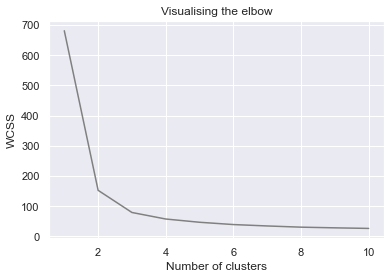

In [7]:
#Plotting the results onto a line graph, allowing us to observe the elbow

plt.plot(range(1, 11), wcss,color='grey')
plt.title('Visualising the elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### From the graph we can conclude the fact that when the number of clusters is 3, within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [8]:
#Fixing the number of clusters to be 3 and applying kmeans algo to the dataset

kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [9]:
#Adding a new column 'Cluster' which tells us the cluster to which the record belongs

cluster_table=df.iloc[:,:]
cluster_table['Cluster']=y_kmeans

In [10]:
cluster_table

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


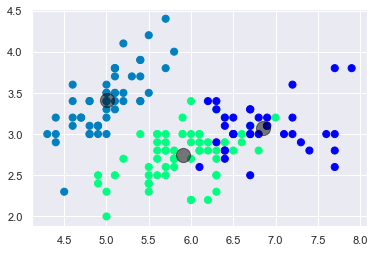

In [11]:
#Visualizing the clusters formed

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='winter')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

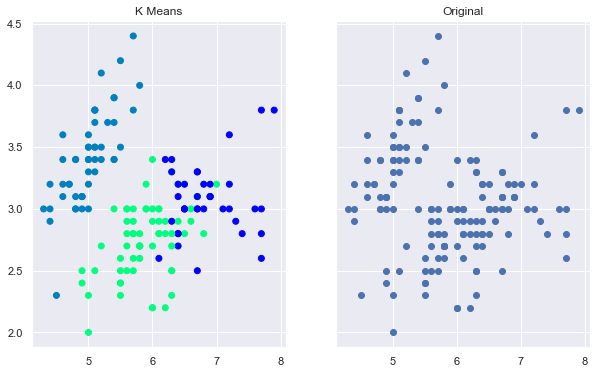

In [12]:
#Comparing our original data versus our clustered results

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(x[:,0],x[:,1],c=kmeans.labels_,cmap='winter')
ax2.set_title("Original")
ax2.scatter(x[:,0],x[:,1],cmap='rainbow')

### Ignoring the color difference in both these graphs, we can see that our original data and the clustered data are more or less similar. Hence we can conclude the optimum number of clusters is *3*

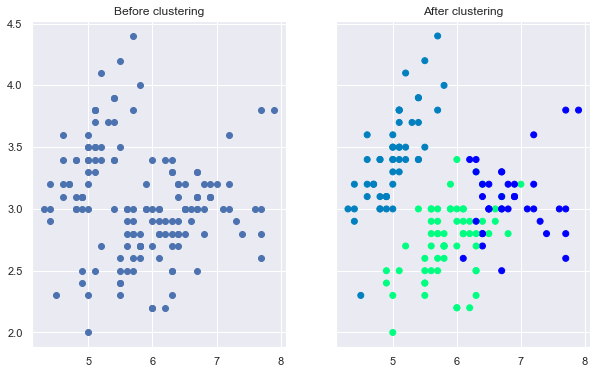

In [13]:
#Comparing Sepal Length and Sepal Width before and after clustering

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Before clustering')
ax1.scatter(df['SepalLengthCm'],df['SepalWidthCm'],cmap='winter')
ax2.set_title("After clustering")
ax2.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=cluster_table['Cluster'],cmap='winter')

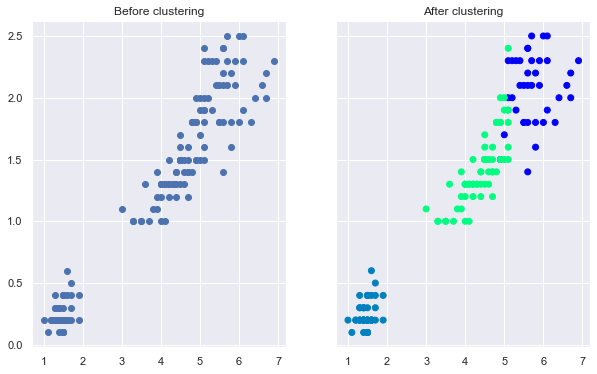

In [14]:
#Comparing Petal Length and Petal Width before and after clustering

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Before clustering')
ax1.scatter(df['PetalLengthCm'],df['PetalWidthCm'],cmap='winter')
ax2.set_title("After clustering")
ax2.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=cluster_table['Cluster'],cmap='winter')